# Hand Written Digits Classifier
The following classifier is implemented as some sort of learning exercise  using ANN, CNN ,SVMs and KNNs to be able to comparatively classifiy hand written digits.


Import the required libraries


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


# Step 1: Import the data: Mnist Dataset

The training set contains 60000 digits each a  2d array of 28 by 28
The test set consist of 10,000 digit images

In [3]:
#Import the data from Keras
from keras.datasets import mnist

#The data is already split into a train and test.
(x_train, y_train), (x_test, y_test) = mnist.load_data()
classes = ['0','1','2','3','4','5','6','7','8','9']

#View the shape
print (x_train.shape)
print (len(y_train))
print ("Test Set",x_test.shape)

(60000, 28, 28)
60000
Test Set (10000, 28, 28)


## Do a bit of exploring
Display the first 25 images from the training set and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

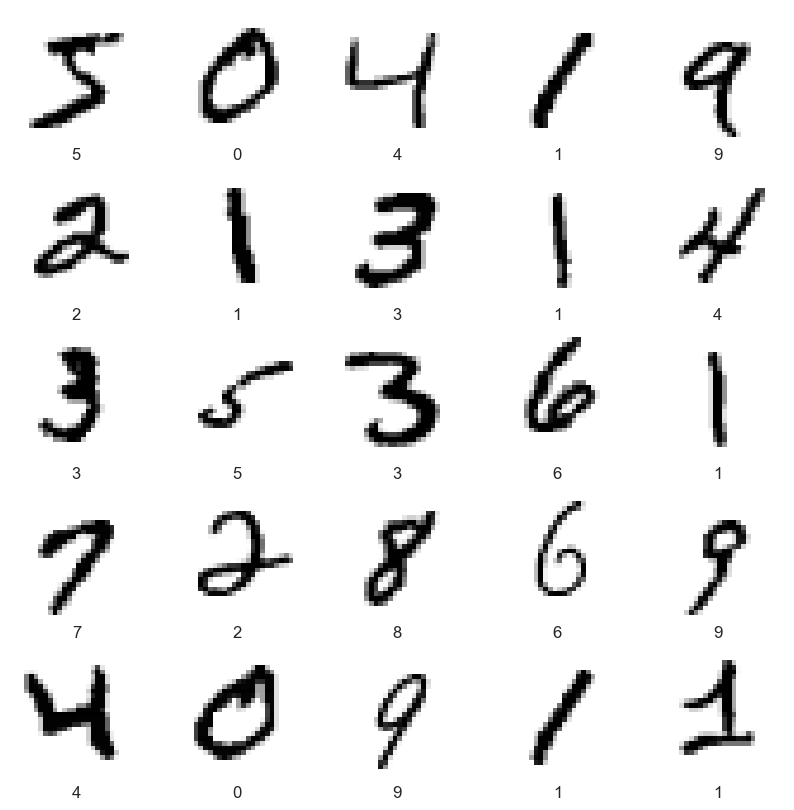

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1) #Subplot cells horizontal and vertical and which one to plot in
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

### Scale the data form 0 to 1 by dividing all through with 255


In [5]:
x_train = x_train/np.float32(255)
x_test = x_test/np.float32(255)

y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

Further Split the data for the other classifiers
The reason for this classifiers ike SVMs dont really need a lot of training samples to classify and would only lengthen our training.

So to remedy this we reduce the training samples to be fed to these classifiers

In [6]:
#Import train test split
from sklearn.model_selection import train_test_split
(x_train2,x_test_hold,y_train2,y_test_hold) = train_test_split(x_train,y_train,
                                                       test_size = 0.8,
                                                      random_state =3)
(x_test2,x_test_hold2,y_test2,y_test_hold2) = train_test_split(x_test_hold,y_test_hold,
                                                      test_size = 0.8)

print(x_train2.shape)
print(x_test2.shape)

(12000, 28, 28)
(9600, 28, 28)


Flatten our train set.

In [7]:
hold = x_train2
hold2 = x_test2

holdlen = len(hold)
hold2len = len(hold2)

x_train2 = [[0 for x in range(784)] for y in range(holdlen)]
x_test2 = [[0 for x in range(784)] for y in range(hold2len)]

for i in range(holdlen):
  x_train2[i] = hold[i].flatten()
  
for i in range(hold2len):
  x_test2[i] = hold2[i].flatten()
  
  
print(len(x_train2))
print(len(x_test2))

12000
9600


# Necessary Functions

## confusion matrix and accuracy computer 

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Making the Confusion Matrix
def plot_confusion_matrix(cm,title=None,cmap=plt.cm.Blues):
    
    if not title:
      title = 'Confusion matrix'

   
    # Only use the labels that appear in the data
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.figsize=(10,10)
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    
    return ax

def precision(label, confusion_matrix):
    col = confusion_matrix[:, label]
    return confusion_matrix[label, label] / col.sum()
    
def recall(label, confusion_matrix):
    row = confusion_matrix[label, :]
    return confusion_matrix[label, label] / row.sum()
def precision_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_precisions = 0
    for label in range(rows):
        sum_of_precisions += precision(label, confusion_matrix)
    return sum_of_precisions / rows
def recall_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_recalls = 0
    for label in range(columns):
        sum_of_recalls += recall(label, confusion_matrix)
    return sum_of_recalls / columns
  
#Compute Accuracy
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

# Classifier 1: K-Nearest Neighbours
## Import K-NN and build and fit our model.

In [9]:
#Import KNN from Sklearn 
from sklearn.neighbors import KNeighborsClassifier
#Number of nneighbors we set to 5
knn_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_model.fit(x_train2,y_train2)

KNeighborsClassifier()

## Test our SVM model


In [10]:
# Predicting the Test set results
knn_pred = knn_model.predict(x_test2)
#Create our confusion Matrix
knn_cm  = confusion_matrix(y_test2,knn_pred)

print("Done")

Done


### Analyze our SVM Model Predictions


<Axes: title={'center': 'KNN Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

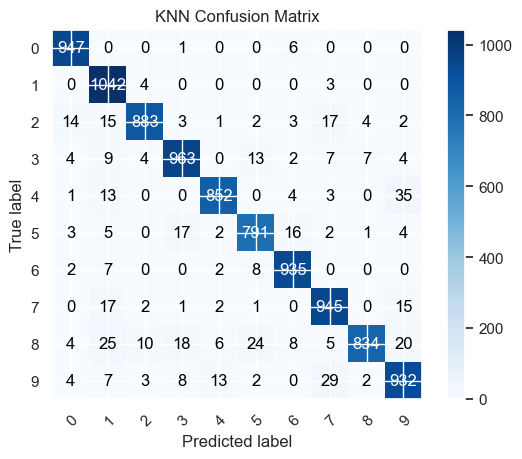

In [11]:
plot_confusion_matrix(knn_cm,"KNN Confusion Matrix")

In [12]:
print("label precision recall")
for label in range(10):
    print(f"{label:5d} {precision(label, knn_cm):9.3f} {recall(label, knn_cm):6.3f}")

label precision recall
    0     0.967  0.993
    1     0.914  0.993
    2     0.975  0.935
    3     0.953  0.951
    4     0.970  0.938
    5     0.941  0.941
    6     0.960  0.980
    7     0.935  0.961
    8     0.983  0.874
    9     0.921  0.932


In [13]:
print("precision total:", precision_macro_average(knn_cm))
print("recall total:", recall_macro_average(knn_cm))

precision total: 0.9518535042135559
recall total: 0.9498525947323826


## KNN Accuracy

In [14]:
print("Accuracy = ", (accuracy(knn_cm)*100))

Accuracy =  95.04166666666667


# Classifier 2: Decision Trees
### Import DecisionTree and build and fit our model.

In [15]:
#Import tree from Sklearn 
from sklearn.tree import DecisionTreeClassifier

#Build and Fit our model
dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_model.fit(x_train2,y_train2) 

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Test our SVM model

In [16]:
# Predicting the Test set results
dt_pred = dt_model.predict(x_test2)
#Create our confusion Matrix
dt_cm  = confusion_matrix(y_test2,dt_pred)

### Analyze our SVM Model Predictions

<Axes: title={'center': 'SVM Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

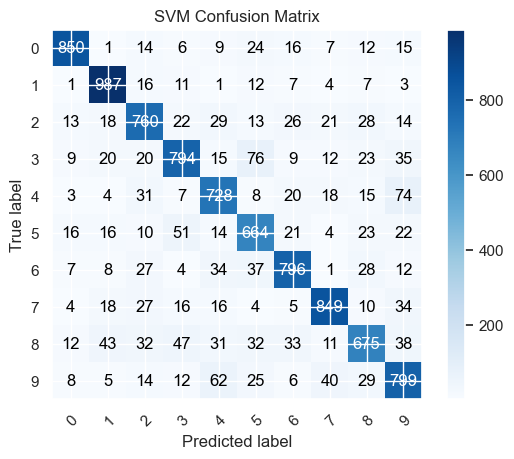

In [17]:
plot_confusion_matrix(dt_cm,"SVM Confusion Matrix")

In [18]:
print("label precision recall")
for label in range(10):
    print(f"{label:5d} {precision(label, dt_cm):9.3f} {recall(label, dt_cm):6.3f}")

label precision recall
    0     0.921  0.891
    1     0.881  0.941
    2     0.799  0.805
    3     0.819  0.784
    4     0.775  0.802
    5     0.742  0.790
    6     0.848  0.834
    7     0.878  0.864
    8     0.794  0.708
    9     0.764  0.799


In [19]:
print("precision total:", precision_macro_average(dt_cm))
print("recall total:", recall_macro_average(dt_cm))

precision total: 0.8220731285805437
recall total: 0.8216686332528107


## Decision Trees Accuracy is about 80% without any extra optimizations or using Random Forests

In [20]:
print("Accuracy = ", (accuracy(dt_cm)*100))

Accuracy =  82.3125


# Classifier 3: SVM
### Import SVM and build and fit our model. Its a multi class SVM

In [21]:
#Import SVM from Sklearn 
from sklearn.svm import SVC

#Build and Fit our model
svm_model = SVC(kernel = 'rbf',gamma='scale', decision_function_shape='ovo')
svm_model.fit(x_train2,y_train2) 

SVC(decision_function_shape='ovo')

### Test our SVM model

In [22]:
# Predicting the Test set results
svm_pred = svm_model.predict(x_test2)
#Create our confusion Matrix
svm_cm  = confusion_matrix(y_test2,svm_pred)

### Analyze our SVM Model Predictions

<Axes: title={'center': 'SVM Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

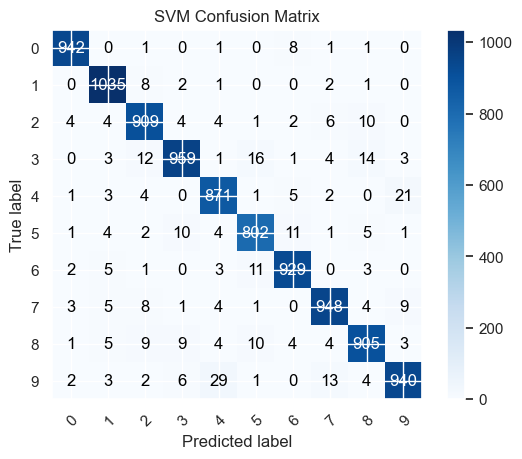

In [23]:
plot_confusion_matrix(svm_cm,"SVM Confusion Matrix")

In [24]:
print("label precision recall")
for label in range(10):
    print(f"{label:5d} {precision(label, svm_cm):9.3f} {recall(label, svm_cm):6.3f}")

label precision recall
    0     0.985  0.987
    1     0.970  0.987
    2     0.951  0.963
    3     0.968  0.947
    4     0.945  0.959
    5     0.951  0.954
    6     0.968  0.974
    7     0.966  0.964
    8     0.956  0.949
    9     0.962  0.940


In [25]:
print("precision total:", precision_macro_average(svm_cm))
print("recall total:", recall_macro_average(svm_cm))

precision total: 0.9621808442135684
recall total: 0.9623396371904841


### SVM Accuracy is about 95% without any extra optimizations on the SVM model.

In [26]:
print("Accuracy = ", (accuracy(svm_cm)*100))

Accuracy =  96.25


# Classifier 4: ANN
### The following section classification is achieved using an artificial network

## Step 1: Build and Compile our model

In [27]:
ann_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation = tf.nn.softmax)
])

##### The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.
#### After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely-connected, or fully-connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer is a 10-node softmax layer—this returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

### Compile the model
### Before the model is ready for training, it needs a few more settings. These are added during the model's compile step: 
#### 1.Loss function —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
#### 2.Optimizer —This is how the model is updated based on the data it sees and its loss function.
#### 3.Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [28]:
ann_model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

## Train the model

In [29]:
ann_model.fit(x_train,y_train,epochs =5)

Epoch 1/5


1875/1875 [==============================] - 5s 2ms/step - loss: 0.2518 - accuracy: 0.9271
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1112 - accuracy: 0.9669
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0761 - accuracy: 0.9765
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0567 - accuracy: 0.9827
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0430 - accuracy: 0.9866


## Evaluate accuracy
Next, compare how the model performs on the test dataset:

In [30]:
test_loss, test_acc = ann_model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc*100)

313/313 [==============================] - 0s 982us/step - loss: 0.0793 - accuracy: 0.9758
Test accuracy: 97.57999777793884


# Classifier 5:CNN

## Building the CNN MNIST Classifier
#### Let's build a model to classify the images in the MNIST dataset using the following CNN architecture:

###### 1.Convolutional Layer #1: Applies 32 5x5 filters (extracting 5x5-pixel subregions), with ReLU activation function
###### 2.Pooling Layer #1: Performs max pooling with a 2x2 filter and stride of 2 (which specifies that pooled regions do not overlap)
###### 3.Convolutional Layer #2: Applies 64 5x5 filters, with ReLU activation function
###### 4.Pooling Layer #2: Again, performs max pooling with a 2x2 filter and stride of 2
###### 5.Dense Layer #1: 1,024 neurons, with dropout regularization rate of 0.4 (probability of 0.4 that any given element will be dropped during training)
###### 6.Dense Layer #2 (Logits Layer): 10 neurons, one for each digit target class (0–9).

#### The tf.layers module contains methods to create each of the three layer types above:

###### 1.conv2d(). Constructs a two-dimensional convolutional layer. Takes number of filters, filter kernel size, padding, and activation function as arguments.
###### 2.max_pooling2d(). Constructs a two-dimensional pooling layer using the max-pooling algorithm. Takes pooling filter size and stride as arguments.
###### 3.dense(). Constructs a dense layer. Takes number of neurons and activation function as arguments.

In [31]:
def cnn_model_fn(features, labels, mode):
  
  #Step 1: Input Layer
  # Note that we've indicated -1 for batch size, which specifies that this 
  # dimension should be dynamically computed based on the number of input 
  # values in features["x"], holding the size of all other dimensions constant.
  # This allows us to treat batch_size as a hyperparameter that we can tune.
  
  input_layer = tf.reshape(features["X"],[-1,28,28,1])
  
  #------------------------------------------------------------------
  #Convolution Layer 1
  
  conv1 = tf.layers.conv2d(
    #Feed our input layer ensure its in the correct format
    inputs = input_layer,
      # Set our number of filters our case 32
    filters = 32,
      # Set the size of the feature matrix
    kernel_size = [5,5],
      # By adding padding we ensure the outputs of the convolution are of the
      # same shape as the input layer 28x28 by adding zeros on th e24x24 output
    padding ="same",
      #Here we set out activation function for the convolution output
    activation = tf.nn.relu)
  
  #--------------------------------------------------------------------
  #Pooling Layer 1
  # we perform max pooling with a filter 2x2
  
  pool1 = tf.layers.max_pooling2D(
      # We feed our input as the convolution output
    inputs = conv1,
      #We set the size of our pooling filter
    pool_size = [2,2],
      # We set the size of shift of the filter, for 2x2 a shift of 2 ensures no
      # overlapping will occur as the filter moves
    strides = 2)
  
  #---------------------------------------------------------------------
  #Convolution Layer 2 and Pooling Layer 2
  # After max pooling with a 2x2 filter the output shape reduces by 50%
  conv2 = tf.layers.conv2d(
  inputs = pool1, #14x14
  filters = 64,
  kernel_size = 5,
  padding = "same",
  activation = tf.nn.relu)
  
  #Pool layer 2
  pool2  = tf.layers.max_pooling2D(
  inputs = conv2,
  pool_size = 2,
  strides = 2)
  
  # This pool layer will output a shape of 7x7
  
  #---------------------------------------------------------------------
  # Dense Layer
  # Our Dense layer will have a total of 1024 neurons
  
  # We flatten our pool2 output
  pool2_flat = tf.reshape(pool2, [-1,7*7*64])
  
  #Now make our dense layer
  dense = tf.layers.dense(inputs = pool2_flat, units=1024, activation=tf.nn.relu)
  
  #---------------------------------------------------------------------
  #To help improve the results of our model, we also apply dropout
  # regularization to our dense layer
  
  dropout = tf.layers.dropout(
      #Input is our dense layer      
    inputs=dense,
      # This sets the drop out rate. 40% of samples will be dropped out
    rate=0.4,
    training=mode == tf.estimator.ModeKeys.TRAIN)
  
  #Our dropout output will have a size of 1024
  
  #----------------------------------------------------------------------
  # Prediction Layer 
  # Has 10 neurons equal to our classes which will return raw values of our 
  # predictors
  
  logits = tf.layers.dense(
      inputs=dropout,
      units = 10) #number of neurons
  
  #--------------------------------------------------------------------
  #Get our predictions
  predictions = {
      # Generate predictions (for PREDICT and EVAL mode)
      "classes": tf.argmax(input=logits, axis=1),
      # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
      # `logging_hook`.
      "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
  }
  
  if mode == tf.estimator.ModeKeys.PREDICT:
    return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

  # Calculate Loss (for both TRAIN and EVAL modes)
  loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

  # Configure the Training Op (for TRAIN mode)
  if mode == tf.estimator.ModeKeys.TRAIN:
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optimizer.minimize(
        loss=loss,
        global_step=tf.train.get_global_step())
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

  # Add evaluation metrics (for EVAL mode)
  eval_metric_ops = {
      "accuracy": tf.metrics.accuracy(
          labels=labels, predictions=predictions["classes"])
  }
  return tf.estimator.EstimatorSpec(
      mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

### Create our estimator

In [34]:
cnn_model= tf.estimator.Estimator(
    #Model FN specifies the model function to be used in training which is code
    # in the previous step
  model_fn = cnn_model_fn,
    #The model directory specifies where to store training checkpoints
  model_dir="")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\shaun\\AppData\\Local\\Temp\\tmpjogjxpwr', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### Set Up a Logging Hook {#set_up_a_logging_hook}
##### Since CNNs can take a while to train, let's set up some logging so we can track progress during training.

In [36]:
# Set up logging for predictions
import tensorflow as tf

# Set up logging for predictions
tensors_to_log = {"probabilities": "softmax_tensor"}

logging_hook = tf.estimator.LoggingTensorHook(
    tensors=tensors_to_log, every_n_iter=50)


Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


### We train the model

In [61]:

import tensorflow as tf
import numpy as np

# Generate random data for demonstration
x_train = np.random.rand(100, 28, 28)
y_train = np.random.randint(0, 2, size=(100,))

# Define the input function
def input_fn():
    dataset = tf.data.Dataset.from_tensor_slices(({"X": x_train}, y_train))
    dataset = dataset.shuffle(buffer_size=10000).batch(32).repeat(10)  # Adjust batch size and repeat as needed
    return dataset

# Define the model function
def model_fn(features, labels, mode):
    # Assume features["X"] is the input layer
    input_layer = tf.reshape(features["X"], [-1, 28, 28, 1])
s
    # Convolution Layer 1 using Keras API
    conv1 = tf.keras.layers.Conv2D(
        filters=32,
        kernel_size=(5, 5),
        padding="same",
        activation=tf.nn.relu
    )(input_layer)

    # Pooling Layer 1 using Keras API
    pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2)(conv1)

    # Flatten and add dense layers, adjust as needed
    flattened = tf.keras.layers.Flatten()(pool1)
    dense1 = tf.keras.layers.Dense(units=128, activation=tf.nn.relu)(flattened)
    output_layer = tf.keras.layers.Dense(units=1, activation=tf.nn.sigmoid)(dense1)

    # Define logits for predictions
    logits = output_layer

    # Define loss and optimizer
    loss = tf.keras.losses.BinaryCrossentropy()(labels, logits)
    optimizer = tf.optimizers.Adam(learning_rate=0.001)

    # Create EstimatorSpec
    if mode == tf.estimator.ModeKeys.TRAIN:
        train_op = optimizer.minimize(lambda: loss, var_list=cnn_model.trainable_variables)
        return tf.estimator.EstimatorSpec(mode, loss=loss, train_op=train_op)
    elif mode == tf.estimator.ModeKeys.EVAL:
        # Add evaluation metrics if needed
        return tf.estimator.EstimatorSpec(mode, loss=loss)
    elif mode == tf.estimator.ModeKeys.PREDICT:
        # Add prediction configuration if needed
        predictions = {"probabilities": tf.nn.sigmoid(logits)}
        return 








## Evaluate the Model
To increase the model perfromance we increase the number of steps , however these greatly increases training periods however

In [64]:
import tensorflow as tf
import numpy as np

# Assuming x_test is a NumPy array and y_test is a NumPy array
x_test = np.random.rand(20, 28, 28)
y_test = np.random.randint(0, 2, size=(20,))

# Define the input function for prediction
def input_fn():
    dataset = tf.data.Dataset.from_tensor_slices(({"X": x_test}, y_test))
    dataset = dataset.batch(32)
    return dataset

# Evaluate the model on test data
cnn_pred = cnn_model.evaluate(input_fn=input_fn)

print(cnn_pred)


INFO:tensorflow:Could not find trained model in model_dir: C:\Users\shaun\AppData\Local\Temp\tmpp4krls2s, running initialization to evaluate.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Done calling model_fn.

INFO:tensorflow:Starting evaluation at 2023-12-01T20:59:04
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Inference Time : 0.35202s
INFO:tensorflow:Finished evaluation at 2023-12-01-20:59:05
INFO:tensorflow:Saving dict for global step 0: global_step = 0, loss = 0.68007195
{'loss': 0.68007195, 'global_step': 0}
